In [11]:
from gamestate import GameState
from minimax import MinimaxAgent
from alphabetaprune import AlphaBetaPruningAgent
from gen import generate_random_piles
import random
import math
import time

EPS = 50
dataset = []
for i in range(EPS):
    sz = random.randint(1, 4)
    mx_sz = 3
    lst = generate_random_piles(sz, mx_sz)
    dataset.append(lst)

start_time = time.time()
for i in range(EPS):
    initial_state = GameState(dataset[i])
    agent = MinimaxAgent()
    result = agent.minimax(initial_state, True)
    assert result == initial_state.get_real_answer()
end_time = time.time()
print(f'Minimax took on average {(end_time - start_time) / EPS}s')

start_time = time.time()
for i in range(EPS):
    initial_state = GameState(dataset[i])
    agent = AlphaBetaPruningAgent()
    result = agent.alphabetapruning(initial_state, -math.inf, math.inf, True)
    assert result == initial_state.get_real_answer()
end_time = time.time()
print(f'AlphaBeta Pruning took on average {(end_time - start_time) / EPS}s')

Minimax took on average 0.07156336784362793s
AlphaBeta Pruning took on average 0.0026903009414672853s


Percentage Correctness at 10 rollouts is 54.0%
Percentage Correctness at 20 rollouts is 60.0%
Percentage Correctness at 30 rollouts is 52.0%
Percentage Correctness at 40 rollouts is 64.0%
Percentage Correctness at 50 rollouts is 57.99999999999999%
Percentage Correctness at 60 rollouts is 66.0%
Percentage Correctness at 70 rollouts is 60.0%
Percentage Correctness at 80 rollouts is 64.0%
Percentage Correctness at 90 rollouts is 60.0%
Percentage Correctness at 100 rollouts is 60.0%
Percentage Correctness at 200 rollouts is 70.0%
Percentage Correctness at 300 rollouts is 66.0%
Percentage Correctness at 400 rollouts is 66.0%
Percentage Correctness at 500 rollouts is 66.0%
Percentage Correctness at 600 rollouts is 70.0%
Percentage Correctness at 700 rollouts is 68.0%
Percentage Correctness at 800 rollouts is 82.0%
Percentage Correctness at 900 rollouts is 74.0%
Percentage Correctness at 1000 rollouts is 72.0%
Percentage Correctness at 2000 rollouts is 88.0%
Percentage Correctness at 3000 rol

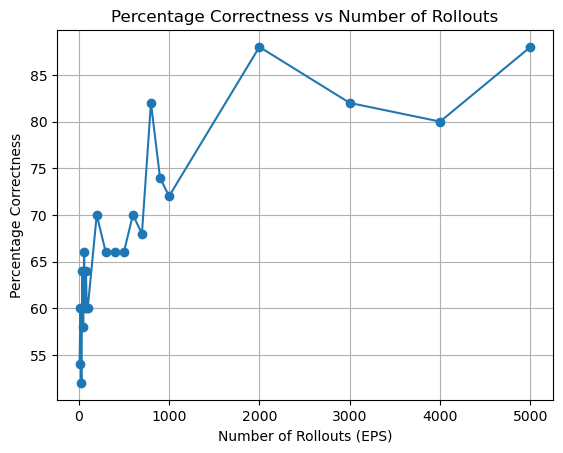

C:\Users\Drake\AppData\Local\Temp\ipykernel_17304\802034312.py:58: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x) + c


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [2]:
from mcts_node import NimPiles
from mcts import MCTS
from gen import generate_random_piles
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def get_real_answer(heaps):
    xr = 0
    for x in heaps:
        xr ^= x
    if xr == 0:
        return 0 
    return 1 

dataset = []
RUN = 50
for i in range(RUN):
    sz = random.randint(1, 5)
    mx_sz = 10
    lst = generate_random_piles(sz, mx_sz)
    dataset.append(lst)

episode_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000]
correctness_percentages = []
for EPS in episode_list:
    correct = 0
    for i in range(RUN):
        tree = MCTS()
        piles = NimPiles(dataset[i])

        for j in range(EPS):
            tree.do_rollout(piles)

        cnt = 0
        while not piles.is_terminal():
            piles = tree.choose(piles)
            cnt += 1
        
        if cnt % 2 == get_real_answer(lst):
            correct += 1

    correctness_percentage = correct / RUN * 100
    
    correctness_percentages.append(correctness_percentage)

    print(f'Percentage Correctness at {EPS} rollouts is {correctness_percentage}%')

plt.plot(episode_list, correctness_percentages, marker='o')
plt.xlabel('Number of Rollouts (EPS)')
plt.ylabel('Percentage Correctness')
plt.title('Percentage Correctness vs Number of Rollouts')
plt.grid(True)
plt.show()